In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the Titanic dataset
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)


In [38]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [40]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [41]:
df['Age'].median()

28.0

In [42]:
df["Fare"].median()

14.4542

In [43]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [44]:
# Handle missing values
df["Age"] = df['Age'].fillna(df['Age'].median())


In [45]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


In [46]:
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [48]:
# Drop the 'Cabin' column because it has too many missing values
df.drop(columns=['Cabin'], inplace=True)

In [49]:
df.drop(columns=['PassengerId'], inplace=True)

In [53]:
df.drop(columns=['Ticket'], inplace=True)

In [54]:
df.drop(columns=['Name'], inplace=True)

In [55]:
# Drop rows with missing target values (if any)
df.dropna(subset=['Survived'], inplace=True)

In [56]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [57]:
# Encode categorical variables
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])

In [58]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,28.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


<AxesSubplot:ylabel='Age'>

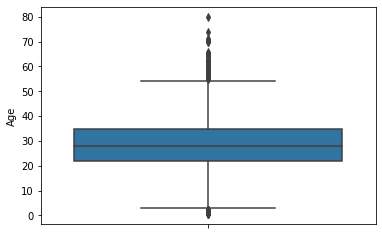

In [59]:
import seaborn as sns

sns.boxplot(y = df["Age"])

<AxesSubplot:ylabel='Fare'>

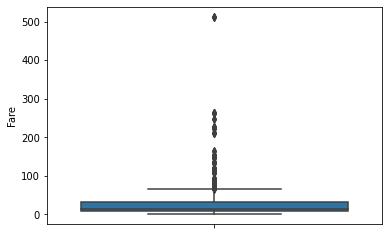

In [60]:

sns.boxplot(y = df["Fare"])

In [62]:
# Calculate Q1, Q3 and IQR
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

print(Q1,Q3,IQR)

7.9104 31.0 23.0896


In [63]:
# Define outliers as those outside of Q1 - 1.5*IQR and Q3 + 1.5*IQR
outliers = df[(df['Fare'] < (Q1 - 1.5 * IQR)) | (df['Fare'] > (Q3 + 1.5 * IQR))]
print("Number of outliers in 'fare':", len(outliers))

# Removing outliers
df_clean = df[~((df['Fare'] < (Q1 - 1.5 * IQR)) | (df['Fare'] > (Q3 + 1.5 * IQR)))]
print("Data shape after outlier removal:", df_clean.shape)

Number of outliers in 'fare': 116
Data shape after outlier removal: (775, 8)


In [64]:
df_clean

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
5,0,3,1,28.0,0,0,8.4583,1
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,28.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


<AxesSubplot:ylabel='Fare'>

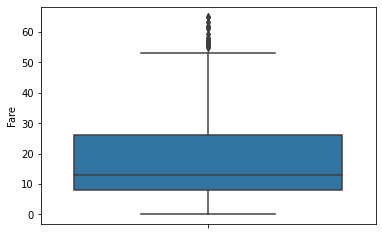

In [65]:
sns.boxplot(y = df_clean["Fare"])

In [66]:
# Calculate Q1, Q3 and IQR
Q1 = df_clean['Age'].quantile(0.25)
Q3 = df_clean['Age'].quantile(0.75)
IQR = Q3 - Q1

print(Q1,Q3,IQR)

# Define outliers as those outside of Q1 - 1.5*IQR and Q3 + 1.5*IQR
outliers = df_clean[(df_clean['Age'] < (Q1 - 1.5 * IQR)) | (df_clean['Age'] > (Q3 + 1.5 * IQR))]
print("Number of outliers in 'fare':", len(outliers))

# Removing outliers
df_clean = df_clean[~((df_clean['Age'] < (Q1 - 1.5 * IQR)) | (df_clean['Age'] > (Q3 + 1.5 * IQR)))]
print("Data shape after outlier removal:", df_clean.shape)

22.0 34.0 12.0
Number of outliers in 'fare': 67
Data shape after outlier removal: (708, 8)


In [67]:
df_clean

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
5,0,3,1,28.0,0,0,8.4583,1
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,28.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


In [68]:
# Define features (X) and target (y)
X = df.drop(columns=['Survived'])
y = df['Survived']

In [69]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,1,1,45.5,0,0,28.5000,2
733,2,1,23.0,0,0,13.0000,2
382,3,1,32.0,0,0,7.9250,2
704,3,1,26.0,1,0,7.8542,2
813,3,0,6.0,4,2,31.2750,2
...,...,...,...,...,...,...,...
106,3,0,21.0,0,0,7.6500,2
270,1,1,28.0,0,0,31.0000,2
860,3,1,41.0,2,0,14.1083,2
435,1,0,14.0,1,2,120.0000,2


In [71]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
709,3,1,28.0,1,1,15.2458,0
439,2,1,31.0,0,0,10.5000,2
840,3,1,20.0,0,0,7.9250,2
720,2,0,6.0,0,1,33.0000,2
39,3,0,14.0,1,0,11.2417,0
...,...,...,...,...,...,...,...
433,3,1,17.0,0,0,7.1250,2
773,3,1,28.0,0,0,7.2250,0
25,3,0,38.0,1,5,31.3875,2
84,2,0,17.0,0,0,10.5000,2


In [72]:
y_train

331    0
733    0
382    0
704    0
813    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 712, dtype: int64

In [73]:
y_test

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64

In [74]:
# Scale numerical features
scaler = StandardScaler()
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,1,1,1.253641,-0.470722,-0.479342,-0.078684,2
733,2,1,-0.477284,-0.470722,-0.479342,-0.377145,2
382,3,1,0.215086,-0.470722,-0.479342,-0.474867,2
704,3,1,-0.246494,0.379923,-0.479342,-0.476230,2
813,3,0,-1.785093,2.931860,2.048742,-0.025249,2


# Logistic Regression

In [80]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
# Setting up the Logistic Regression classifier
lr = LogisticRegression(random_state=42)

In [82]:
# Defining the parameters for GridSearchCV
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'max_iter': [100, 500, 1000]
}

In [83]:
# Applying GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'max_iter': [100, 500, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None]},
             return_train_score=True, scoring='accuracy')

In [84]:
# Getting the best estimator
best_lr = grid_search.best_estimator_

In [85]:
# Making predictions
y_pred = best_lr.predict(X_test)
y_pred_proba = best_lr.predict_proba(X_test)[:, 1]

results_df = pd.DataFrame({
    'Actual Label': y_test,
    'Predicted Probability': y_pred_proba,
    'Predicted Label': y_pred
})

# Display the first 5 instances in the result dataframe
results_df.head()


,Actual Label,Predicted Probability,Predicted Label
709,1,0.114236,0
439,0,0.221719,0
840,0,0.134519,0
720,1,0.884485,1
39,1,0.744697,1


In [86]:
# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 81.01%


In [87]:
# Printing the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [89]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
cm

Confusion Matrix:


array([[90, 15],
       [19, 55]])

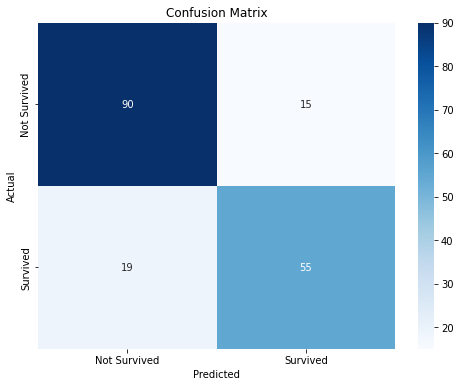

In [91]:
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



In [ ]:
# AUC-ROC
auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Printing the best parameters
print("Best parameters found by GridSearchCV:")
print(grid_search.best_params_)

In [1]:
importance_of_features = best_lr.coef_[0]
importance_of_features
X.columns
Feature_Importance = pd.Series(importance_of_features, index = X.columns)
Feature_Importance

NameError: name 'best_lr' is not defined

# Niave Bayes

### Without pipeline

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns


# Setting up the Naive Bayes classifier
nb = GaussianNB()

# Training the Naive Bayes classifier
nb.fit(X_train, y_train)

# Making predictions
y_pred = nb.predict(X_test)
y_pred_proba = nb.predict_proba(X_test)[:, 1]

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Printing the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# AUC-ROC
auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


### With pipeline

In [2]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression # For Logistic Regression
from sklearn.metrics import accuracy_score

# Import Required Libraries and apply Naive Bayes algorithm
from sklearn.naive_bayes import GaussianNB
# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('nb', GaussianNB())
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

#Predict on the training and testing set
y_pred_train_nb = pipeline.predict(X_train)
y_pred_test_nb = pipeline.predict(X_test)

# Calculate the training and testing accuracy
training_accuracy = accuracy_score(y_train, y_pred_train_nb)
testing_accuracy = accuracy_score(y_test, y_pred_test_nb)
print("\nNaïve Bayes:")
print(f"Training Accuracy: {training_accuracy}")
print(f"Testing Accuracy: {testing_accuracy}")

y_pred_prob_nb = pipeline.predict_proba(X_test)[:, 1]

results_df = pd.DataFrame({
    'Actual Label': y_test,
    'Predicted Label': y_pred_test_nb,
    'Predicted Probability': y_pred_prob_nb
})

results_df.head()

# Print confusion matrix
conf_matrix_nb = confusion_matrix(y_test, y_pred_test_nb)
print("Confusion Matrix:")
print(conf_matrix_nb)

# Heatmap visualization for confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix_nb, display_labels = ["benign", "malignant"])
# display matrix
cm_display.plot()
plt.show()

# Print classification report
print("\t\tNaïve Bayes Classification Report:")
print("\t\t-----------------------------------")
print(classification_report(y_test, y_pred_test_nb))



NameError: name 'X_train' is not defined

# KNN

### With Pipeline

In [ ]:
# Import Required Libraries and apply K-Nearest Neighbors
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import ConfusionMatrixDisplay


pipeline_knn = Pipeline([
    ('normalizer',Normalizer()),
    ('scaler', StandardScaler()),   # Standardize the data
    ('knn', KNeighborsClassifier(n_neighbors=3)) # KNN classifier
])
pipeline_knn.fit(X_train, y_train)

# Predict on the training and testing set
y_pred_train_knn = pipeline_knn.predict(X_train)
y_pred_test_knn = pipeline_knn.predict(X_test)

# Calculate training and testing accuracy
training_accuracy = accuracy_score(y_train, y_pred_train_knn)
testing_accuracy = accuracy_score(y_test, y_pred_test_knn)
print("\nK-Nearest Neighbors (KNN)")
print(f"Training Accuracy: {training_accuracy}")
print(f"Testing Accuracy: {testing_accuracy}")

y_pred_prob_knn = pipeline_knn.predict_proba(X_test)[:, 1]

results_df = pd.DataFrame({
    'Actual Label': y_test,
    'Predicted Label': y_pred_test_knn,
    'Predicted Probability': y_pred_prob_knn
})

results_df.head()

# Print confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_test_knn)
print("Confusion Matrix:")
print(conf_matrix_knn)

# Heatmap visualization for confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix_knn, display_labels = ["benign", "malignant"])
# display matrix
cm_display.plot()
plt.show()

# Print classification report
print("\t\tK-Nearest Neighbors Classification Report:")
print("\t\t-----------------------------------")
print(classification_report(y_test, y_pred_test_knn))


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

scaler = StandardScaler()
normalizer = Normalizer()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

# Defining the parameters for GridSearchCV
param_grid = {
    'n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
    'metric': ["euclidean", 'manhattan']
}

knn = KNeighborsClassifier()

# Applying GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

best_knn =grid_search.best_estimator_


# Making predictions
y_pred = best_knn.predict(X_test)
y_pred_proba = best_knn.predict_proba(X_test)[:, 1]

results_df = pd.DataFrame({
    'Actual Label': y_test,
    'Predicted Probability': y_pred_proba,
    'Predicted Label': y_pred
})

# Display the first 5 instances in the result dataframe
results_df.head()

# Calculate training and testing accuracy
training_accuracy = accuracy_score(y_train, y_pred_train_knn)
testing_accuracy = accuracy_score(y_test, y_pred_test_knn)
print("\nK-Nearest Neighbors (KNN)")
print(f"Training Accuracy: {training_accuracy}")
print(f"Testing Accuracy: {testing_accuracy}")

# Print confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_test_knn)
print("Confusion Matrix:")
print(conf_matrix_knn)

# Heatmap visualization for confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix_knn, display_labels = ["benign", "malignant"])
# display matrix
cm_display.plot()
plt.show()

# Print classification report
print("\t\tK-Nearest Neighbors Classification Report:")
print("\t\t-----------------------------------")
print(classification_report(y_test, y_pred_test_knn))